In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
player_df = pd.read_csv("data/FullData.csv")
fifa = player_df

In [3]:
player_df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07-01-2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07-01-2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07-01-2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07-11-2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07-01-2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [4]:
player_df = player_df.drop(['Club_Joining','Contract_Expiry','Height','Weight','Birth_Date','Work_Rate','Weak_foot','Dribbling',
'Marking','Sliding_Tackle','Aggression','Reactions','Interceptions','Vision','Composure','Crossing','Balance','Agility','Jumping','Heading','Finishing','Curve','Volleys'],axis=1)

In [5]:
player_df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,94,Right,32,...,80,92,90,76,85,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,93,Left,29,...,59,85,88,90,74,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,92,Right,25,...,49,78,77,84,81,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,92,Right,30,...,76,87,86,84,85,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,92,Right,31,...,83,25,16,11,47,91,89,95,90,89


In [6]:
player_df.shape

(17588, 30)

In [7]:
player_df.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Rating                    0
Preffered_Foot            0
Age                       0
Preffered_Position        0
Skill_Moves               0
Ball_Control              0
Standing_Tackle           0
Attacking_Position        0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina                   0
Strength                  0
Shot_Power                0
Long_Shots                0
Freekick_Accuracy         0
Penalties                 0
GK_Positioning            0
GK_Diving                 0
GK_Kicking                0
GK_Handling               0
GK_Reflexes               0
dtype: int64

In [8]:
player_df[player_df['Club_Position'].isnull()]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
383,Didier Drogba,Ivory Coast,NaN,NaN,Free agent,NaN,NaN,81,Right,39,...,86,85,79,84,84,6,10,8,11,14


In [9]:
player_df.dropna(subset=['Club_Position'], how="all", inplace=True)
player_df

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,94,Right,32,...,80,92,90,76,85,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,93,Left,29,...,59,85,88,90,74,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,92,Right,25,...,49,78,77,84,81,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,92,Right,30,...,76,87,86,84,85,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,92,Right,31,...,83,25,16,11,47,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,90,Right,26,...,64,31,12,19,40,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,90,Right,28,...,84,86,82,76,81,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,90,Left,27,...,80,91,90,85,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,90,Right,35,...,93,93,88,82,91,9,13,10,15,12
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,89,Left,24,...,70,36,17,11,27,86,84,69,91,89


In [10]:
player_df.groupby('Club_Position')['Rating'].max()

Club_Position
CAM    89
CB     85
CDM    86
CF     70
CM     83
GK     92
LAM    84
LB     86
LCB    89
LCM    88
LDM    87
LF     86
LM     88
LS     83
LW     94
LWB    81
RAM    81
RB     88
RCB    88
RCM    89
RDM    86
RF     83
RM     87
RS     88
RW     93
RWB    82
Res    83
ST     92
Sub    89
Name: Rating, dtype: int64

In [11]:
df = player_df[player_df.groupby(['Club_Position'])['Rating'].transform(max) == player_df['Rating']]

In [12]:
df.Club_Position.unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', 'CF'], dtype=object)

In [13]:
df = df[(df.Club_Position != 'Sub') & (df.Club_Position != 'Res')]

In [14]:
df

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,94,Right,32,...,80,92,90,76,85,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,93,Left,29,...,59,85,88,90,74,14,6,15,11,8
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,92,Right,30,...,76,87,86,84,85,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,92,Right,31,...,83,25,16,11,47,91,89,95,90,89
12,Luka Modrić,Croatia,NaN,NaN,Real Madrid,RCM,19.0,89,Right,31,...,58,73,82,77,80,14,13,7,9,9
13,Mesut Özil,Germany,CAM,10.0,Arsenal,CAM,11.0,89,Left,28,...,56,70,76,79,67,6,6,10,14,14
15,Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,89,Right,32,...,81,78,71,73,71,9,9,5,12,10
16,Sergio Ramos,Spain,LCB,15.0,Real Madrid,LCB,4.0,89,Right,31,...,81,79,55,67,68,7,11,9,8,11
18,Paul Pogba,France,NaN,NaN,Manchester Utd,LCM,6.0,88,Right,24,...,91,90,88,82,76,4,5,2,6,3
19,Antoine Griezmann,France,CAM,7.0,Atlético Madrid,RS,7.0,88,Left,26,...,61,81,82,75,71,13,14,14,8,14


In [15]:
#df = df.drop_duplicates(subset='Club_Position', keep="first")

In [16]:
# categories
attackers = ['LW', 'RW', 'ST', 'RS', 'LS', 'LF', 'CF', 'RF']
midfielders = ['CM', 'RCM', 'LCM', 'CAM','LAM', 'RAM', 'LM', 'RM', 'CDM', 'RDM', 'LDM']
defenders = ['LCB', 'CB', 'RCB', 'LB', 'RDM', 'RB', 'RWB', 'LWB']
goalkeeper = ['GK']

In [17]:
df[df['Club_Position'].isin(attackers)]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,94,Right,32,...,80,92,90,76,85,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,93,Left,29,...,59,85,88,90,74,14,6,15,11,8
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,92,Right,30,...,76,87,86,84,85,33,27,31,25,37
19,Antoine Griezmann,France,CAM,7.0,Atlético Madrid,RS,7.0,88,Left,26,...,61,81,82,75,71,13,14,14,8,14
56,Radja Nainggolan,Belgium,Sub,16.0,Roma,LF,4.0,86,Right,28,...,78,84,86,68,63,8,11,14,11,11
159,Sebastian Giovinco,Italy,NaN,NaN,Toronto FC,LS,10.0,83,Right,30,...,48,78,80,86,75,3,6,6,3,3
160,Anthony Modeste,France,NaN,NaN,1. FC Köln,LS,27.0,83,Right,28,...,86,81,72,56,77,6,10,11,11,8
166,Jonas,Brazil,NaN,NaN,SL Benfica,LS,10.0,83,Right,32,...,61,80,84,77,83,8,12,7,11,5
167,Kévin Gameiro,France,Sub,10.0,Atlético Madrid,LS,21.0,83,Right,29,...,64,84,76,70,85,8,6,8,10,6
181,Borja Valero,Spain,NaN,NaN,Fiorentina,RF,20.0,83,Right,32,...,66,72,70,76,72,8,5,10,4,7


In [18]:
df[df['Club_Position'].isin(midfielders)]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
12,Luka Modrić,Croatia,NaN,NaN,Real Madrid,RCM,19.0,89,Right,31,...,58,73,82,77,80,14,13,7,9,9
13,Mesut Özil,Germany,CAM,10.0,Arsenal,CAM,11.0,89,Left,28,...,56,70,76,79,67,6,6,10,14,14
18,Paul Pogba,France,NaN,NaN,Manchester Utd,LCM,6.0,88,Right,24,...,91,90,88,82,76,4,5,2,6,3
23,Toni Kroos,Germany,LDM,8.0,Real Madrid,LCM,8.0,88,Right,27,...,74,87,88,84,73,7,10,13,11,10
32,Iniesta,Spain,LCM,6.0,FC Barcelona,LM,8.0,88,Right,32,...,59,65,74,70,71,13,6,6,13,7
37,Arturo Vidal,Chile,CDM,8.0,FC Bayern,LDM,23.0,87,Right,29,...,79,84,85,68,84,2,4,4,2,4
42,Arjen Robben,Netherlands,RW,11.0,FC Bayern,RM,10.0,87,Left,33,...,65,86,88,83,80,5,10,11,8,15
49,Sergio Busquets,Spain,CDM,5.0,FC Barcelona,CDM,5.0,86,Right,28,...,77,61,54,68,60,9,5,13,8,13
50,Thiago,Spain,Sub,10.0,FC Bayern,RDM,6.0,86,Right,25,...,59,75,82,77,75,9,6,7,11,13
105,Ivan Perišić,Croatia,NaN,NaN,Inter,LAM,44.0,84,Right,28,...,77,83,80,76,76,9,6,10,7,6


In [19]:
df[df['Club_Position'].isin(defenders)]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Rating,Preffered_Foot,Age,...,Strength,Shot_Power,Long_Shots,Freekick_Accuracy,Penalties,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
15,Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,89,Right,32,...,81,78,71,73,71,9,9,5,12,10
16,Sergio Ramos,Spain,LCB,15.0,Real Madrid,LCB,4.0,89,Right,31,...,81,79,55,67,68,7,11,9,8,11
28,Philipp Lahm,Germany,NaN,NaN,FC Bayern,RB,21.0,88,Right,33,...,59,57,65,59,69,14,11,5,12,5
29,Pepe,Portugal,RCB,3.0,Real Madrid,RCB,3.0,88,Right,34,...,84,63,56,47,57,9,8,5,15,10
45,David Alaba,Austria,LM,8.0,FC Bayern,LB,27.0,86,Left,24,...,69,83,83,83,80,15,5,14,7,9
50,Thiago,Spain,Sub,10.0,FC Bayern,RDM,6.0,86,Right,25,...,59,75,82,77,75,9,6,7,11,13
57,Marcelo,Brazil,LB,16.0,Real Madrid,LB,12.0,86,Left,28,...,77,83,66,67,59,5,12,5,5,9
71,Toby Alderweireld,Belgium,RCB,2.0,Spurs,CB,4.0,85,Right,28,...,81,86,66,69,60,16,16,14,6,14
78,Sokratis,Greece,RCB,19.0,Bor. Dortmund,CB,25.0,85,Right,28,...,86,79,44,35,38,12,6,5,8,5
236,Kyle Walker,England,RB,2.0,Spurs,RWB,2.0,82,Right,26,...,77,86,68,71,63,15,12,16,6,8


In [20]:
def team(d,m,a):
    l = []
    for i in range(d):
        l.append(df[df['Club_Position'].isin(defenders)]['Name'].iloc[i])
    for i in range(m):
        l.append(df[df['Club_Position'].isin(midfielders)][0:m]['Name'].iloc[i])
    for i in range(a):
        l.append(df[df['Club_Position'].isin(attackers)][0:a]['Name'].iloc[i])
    l.append(df[df['Club_Position'].isin(goalkeeper)]['Name'].iloc[0])
    return l

t = team(3,4,3)
team_df = pd.DataFrame({'name':t})
#print team(5,3,2)

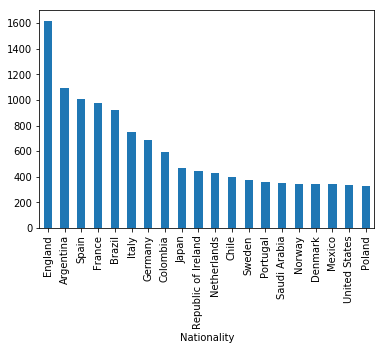

In [21]:
#example plot
player_df.groupby("Nationality").Name.count().sort_values(ascending=False).head(20).plot(kind="bar")

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
train_data, test_data = train_test_split(fifa, test_size=0.20, random_state=0)
#choose columns with player stats
parameters = fifa.columns[17:53]
#split into training - stats and rating
X = train_data[parameters]
Y = train_data.loc[:,'Rating'] #all rows of rating columns

In [24]:
rfclf = RandomForestClassifier()
rfclf.fit(X, Y)
prediction = rfclf.predict(test_data[parameters])

In [25]:
output = test_data.loc[:,['Name','Rating']]
output['Predicted_Rating'] = prediction
output['difference']=output.loc[:,'Rating']-output.loc[:,'Predicted_Rating']
output.head()

,Name,Rating,Predicted_Rating,difference
15213,Tetsuya Enomoto,58,58,0
10311,Frederik Helstrup,65,63,2
16351,Rikiya Uehara,55,51,4
3553,Ji Dong Won,72,72,0
16142,David Sauerland,56,60,-4


In [26]:
print('Mean difference: ',output['difference'].mean())
print('Exact match of predicted and actual:',len(output[output['difference']==0]))

('Mean difference: ', 0.5446276293348493)
('Exact match of predicted and actual:', 652)
